## wordcloud
wordcloud とは，文書中で出現頻度の高い語を，その頻度に応じた大きさで表示（可視化）する手法である。

### Anaconda で wordcloud を利用するための準備
予め wordcloud ライブラリをインストールする。
```
$ conda install -c conda-forge wordcloud
```

### wordcloud を使ってみる
青空文庫
https://www.aozora.gr.jp/
より取得した夏目漱石「こころ」のテキストを用いて，wordcloud を試してみる。
以下に手順を逐次，説明する。

最初に「こころ」テキストファイル "kokoro.txt"
https://www.aozora.gr.jp/cards/000148/files/773_ruby_5968.zip
を取ってきて，適当なディレクトリに置く。

MeCab を用いて，テキスト中の単語をスペースで区切る。
以下の例では，テキストを全て読み込み，（頻出する）助詞と助動詞を除いて「単語がスペースで区切られたテキスト」を生成している。

In [3]:
import codecs
import MeCab

file = codecs.open('kokoro.txt','r', 'utf-8', 'ignore')
text = file.read() # データの一気読み
 
m = MeCab.Tagger('')
text = text.replace('\r','')
parsed = m.parse(text)

#助詞、助動詞を除いて単語結合
splitted = ' '.join([x.split('\t')[0] for x in parsed.splitlines()[:-1] if x.split('\t')[1].split(',')[0] not in ['助詞', '助動詞']])

In [6]:
# 先頭の 1000文字を出力
splitted[:1000]

'\ufeff こころ 夏目 漱石 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ------------------------- 【 テキスト 中 現れる 記号 】 《 》 ： ルビ （ 例 ） 私 《 わたくし 》 ｜ ： ルビ 付く 文字 列 始まり 特定 する 記号 （ 例 ） 先生 一 人 ｜ 麦藁 帽 《 むぎ わら ぼう 》 ［＃］： 入力 者 注 \u3000 主 外字 説明 、 傍点 位置 指定 \u3000 \u3000 \u3000 （ 数字 、 JIS X 0213 面 区点 番号 、 または 底本 ページ 行 数 ） （ 例 ）※［＃「 へん ＋ 劣 」 、 第 3 水準 1 - 84 - 77 ］ - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ------------------------- ［ ＃ ２ 字 下げ ］ 上 \u3000 先生 私 ［ ＃「 上 \u3000 先生 私 」 大 見出し ］ ［＃ ５ 字 下げ ］ 一 ［＃「 一 」 中 見出し ］ \u3000 私 《 わたくし 》 その 人 常に 先生 呼ん い 。 だから ここ ただ 先生 書く 本名 打ち明け 。 これ 世間 憚 《 ば 》 かる 遠慮 いう 、 その 方 私 自然 。 私 その 人 記憶 呼び 起す ごと 、 すぐ 「 先生 」 いい なる 。 筆 執 《 》 心持 同じ 事 。 よそよそしい 頭文字 《 かしら 》 とても 使う 気 なら 。 \u3000 私 先生 知り合い なっ の 鎌倉 《 かまくら 》 。 その 時 私 まだ 若々しい 書生 。 暑中 休暇 利用 し 海水浴 行っ 友達 ぜひ 来い 端書 《 はがき 》 受け取っ 、 私 多少 金 工面 《 くめ 》 し 、 出掛ける 事 し 。 私 金 工面 二 《 》 、 三 日 《 さん ち 》 費やし 。 ところが 私 鎌倉 着い 三 日 経 《 》 ない うち 、 私 呼び寄せ 友達 、 急 国元 帰れ 電報 受け取っ 。 電報 母 病気 断っ あっ 友達 それ 信じ 。 友達 かね 国元 いる 親 たち 勧 《 すす 》 ま ない 

次に wordcloud ライブラリをインポートし，先程の「スペース区切りのテキスト」を与える。

可視化には matplotlib を用いる。

なお，日本語テキストを分析対象とする場合，font_path にて日本語フォントを指定する必要がある

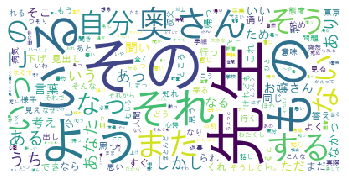

In [11]:
import wordcloud
import matplotlib.pyplot as plt

wordc = wordcloud.WordCloud(font_path='HGRGM.TTC', # 日本語フォントの指定
                            background_color='white',
                            contour_color='steelblue',
                            contour_width=2).generate(splitted)

# 実行結果のファイルへの保存
# wordc.to_file('sample-wordCloud-jpn.png')

# 可視化
plt.imshow(wordc)
plt.axis('off')
plt.show()

上記の結果より，なんとなく「こころ」っぽいキーワードである「先生」「奥さん」「お嬢さん」が見えるだろう。
一方，「その」「よう」「もの」等，分析に不要な指示代名詞が大きく表示されている。

このように分析に不要な（不要と考えられる）語を除去するには，不要語(stop words)リストを設定すればよい。

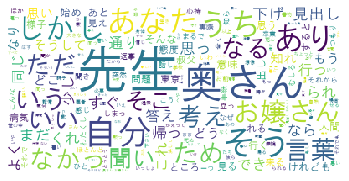

In [10]:
import wordcloud
import matplotlib.pyplot as plt

# 不要語リスト
stopwords = ['その','よう','もの','それ','いる','する','この','また',
            'なっ', 'あっ','いっ', 'ある','ない']

wordc = wordcloud.WordCloud(font_path='HGRGM.TTC', # 日本語フォントの指定
                            stopwords=stopwords,
                            background_color='white',
                            contour_color='steelblue',
                            contour_width=2).generate(splitted)

# 実行結果のファイルへの保存
# wordc.to_file('sample-wordCloud-jpn.png')

# 可視化
plt.imshow(wordc)
plt.axis('off')
plt.show()

### 感情分析と wordcloud
一般に感情を表す品詞は形容詞が主である。

以下では名詞と形容詞をテキストから抽出し，wordcloud による可視化を行っている。

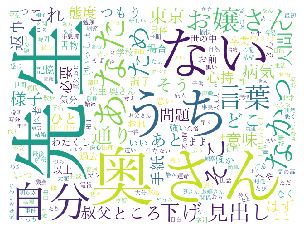

In [14]:
# 夏目漱石，こころ
import MeCab
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# テキストファイル読み込み
with open('kokoro.txt', mode='rt', encoding='utf-8') as fi:
    source_text = fi.read()

# MeCabの準備
tagger = MeCab.Tagger()
tagger.parse('')
node = tagger.parseToNode(source_text)

# 名詞・形容詞を取り出す
word_list = []
while node:
    word_type = node.feature.split(',')[0]
    if word_type in ['名詞', '形容詞']:
        word_list.append(node.surface)
    node = node.next

# リストを文字列に変換
word_chain = ' '.join(word_list)

stopwords = ['もの', 'よう', 'それ']

# ワードクラウド作成
W = WordCloud(width=640, height=480,
              stopwords = stopwords,
              background_color='white',
              font_path='C:\Windows\Fonts\yumin.ttf').generate(word_chain)

plt.imshow(W)
plt.axis('off')
plt.show()

## COVID-19 関連ツイートを対象とした wordcloud
wordcloud を COVID-19 関連ツイートに適用するプログラムおよび実行結果を以下に示す。

以下の例では2020年6月12日のツイートを対象としているが，北九州市や東京都で陽性者が増加したタイミング等で試してみると面白いかもしれない。

また，「コロナ」「ウイルス」「感染」は時期を問わず頻出する語であることから，これらを不要語として取り扱うことでそれぞれのイベントが生じたタイミングでの注目キーワードを捉えられる可能性がある。

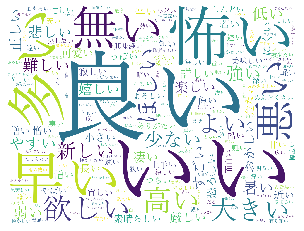

In [18]:
import MeCab
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# テキストファイル読み込み
with open(r'C:\Users\yoshi\Dropbox\ExpSSE3\Tweets\20200612_MERS.txt', mode='rt', encoding='utf-8') as f:
    source_text = ""

    for line in f.readlines():
        # 何故か分からないが，id, retweet_count 等が含まれないテキストのみの行が存在する
        try:
            status_id, retweet_count, favorite_count, text = line.rstrip('\n').split('\t')
        except ValueError:
            pass

        status_id = int(status_id)
        retweet_count = int(retweet_count)
        favorite_count = int(favorite_count)

        # URL を含むツイートを排除（超簡易版の実装）
        if "http" in text:
            continue
                
        source_text += text

# MeCabの準備
tagger = MeCab.Tagger()
tagger.parse('')
node = tagger.parseToNode(source_text)


# 名詞・形容詞を取り出す
word_list = []
while node:
    word_type = node.feature.split(',')[0]
    kihon = node.feature.split(',')[6]
    # if word_type in ['形容詞','名詞']:
    if word_type == '形容詞':
        word_list.append(kihon) # 基本形を記録する

    node = node.next

# リストを文字列に変換
word_chain = ' '.join(word_list)

stopwords = ['新型', 'コロナ', 'ウイルス', '感染',
             'こと', 'よう', 'ない', 'これ', 'そう', 'それ', 'もの',
             'ため', 'さん']

# ワードクラウドの作成
W = WordCloud(width=1280, height=960, # width=640, height=480,
              stopwords = stopwords,
              background_color='white',
              font_path='C:\Windows\Fonts\yumin.ttf').generate(word_chain)

plt.imshow(W)
plt.axis('off')
plt.show()